# K-MEDIAS-BORROSO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def formula(d, b):
    """
    Formula necesaria para el cálculo de K-medias
    Devuelve el resultado de la misma
    """
    return np.power(
        1 / d,
        (1 / (b - 1))
    )

In [3]:
def dist(x, v):
    """
    Calcula la distancia de un punto X y respecto a su centroide V
    Devuelve el resultado de la misma
    """
    return np.sum(
        np.square(x - v)
    )

In [4]:
def calcularDivisor(Xj, V, b = 2):
    """
    Calcula el divisor sumando todos valores obtenidos de la función 'formula'
    Devuelve el sumatorio
    """
    divisor = 0
    for k in V:
        res = formula(
            dist(Xj, k),
            b
        )
        divisor += res
        
    return divisor

In [5]:
def calcularP(X, V, b = 2):
    """
    Calcula la variable P a partir de un conjunto de datos X, los centroides V, y un valor B
    dado por el enunciado.
    """
    
    P = np.zeros((V.shape[0], X.shape[0]))
    for j in range(X.shape[0]):
        for i in range(V.shape[0]):
            dividendo = formula(dist(V[i], X[j]), b)
            divisor = calcularDivisor(X[j], V)

            P[i, j] = dividendo / divisor
            
    return P

In [29]:
def recalcularCentros(X, U):
    """
    Calcula otra vez los centros a partir del array X y el array U.
    Devuelve el cálculo
    """
    print()
    fin = []
    for i in range(U.shape[0]):
        aux = []
        for j in range(U.shape[1]):
            aux.append(np.square(U[i, j]) * X[j])

        dividendo = np.sum(np.array(aux), axis=0)
        divisor = np.sum(np.square(U[i, :]))
        fin.append(dividendo / divisor)
        
    return np.array(fin)

In [7]:
def cumpleEpsilon(vAntiguo, vNuevo, epsilon):
    """
    Función que calcula la distancia de un centroide y comprueba
    si es mayor o menor que epsilon (máximo error permitido)
    Devuelve un booleano
    """
    return np.sqrt(np.sum(np.square(vNuevo-vAntiguo))) < epsilon

In [ ]:
def seguirActualizando(vAntiguo, vNuevo, epsilon):
    """
    Función que comprueba si hay algún valor superior a epsilon
    en alguna de las componentes
    Devuelve un booleano
    """
    actualizar = False
    for i in range(vAntiguo.shape[0]):
        if(not cumpleEpsilon(vAntiguo, vNuevo, epsilon)):
            actualizar = True
            break
            
    return actualizar

In [8]:
def dibujarGrafica(X, V):
    """
    Dibuja una gráfica con los centroides y los valores de X
    Solo cuando los centroides V tienen dos dimensiones
    """
    if(V.shape[1] == 2):
        colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        ax = plt.gca()    

        for i in range(V.shape[0]):

            ax.add_patch(plt.Circle((V[i, 0], V[i, 1]), 2, color=colores[i], alpha=0.4))
            ax.plot(V[i, 0], V[i, 1], 'o', c = 'r')

        ax.plot(X[:, 0], X[:, 1], 'o', c = 'b')

        plt.show()

In [18]:
def kMedias(X, V, b, epsilon):
    """
    Gestiona el algoritmo de KMedias, devuelve los centroides entrenados a partir de
    un conjunto de datos X, los centroides iniciales, un valor b y un error mínimo epsilon
    """
    print("\n########## ENTRENAMIENTO DE K-MEDIAS ##########\n")
    i = 0
    while True:
        P = calcularP(X, V, b)
        vNuevo = recalcularCentros(X, P)
        if seguirActualizando(V, vNuevo, epsilon):
            print("En la iteración {} los centroides son:\n{}"
                 .format(i, V))
            dibujarGrafica(X, V)
            V = vNuevo
        else:
            print("Hemos terminado en la iteración {}, con los centroides:\n{}\n"
                 .format(i, V))
            dibujarGrafica(X, V)

            break

        i += 1
        
    return V

In [24]:
def testKMedias(V, vName, directorio='test'):
    """
    Función que calcula la distancia de todas las pruebas ubicadas en la
    carpeta 'directorio' a partir del vector de centroides, su etiqueta, y
    el nombre de la carpeta.
    No devuelve nada, muestra por pantalla a que clase pertenece dicha
    prueba
    """
    print("########## TEST DE K-MEDIAS ##########")
    for file in os.listdir(directorio):
        df = pd.read_csv(directorio + '/' + file, header=None)
        pruebaX = np.array(df.iloc[:, :-1])
        pruebaY = np.array(df.iloc[:, -1])
        P = calcularP(pruebaX, V)
        posMax = P.argmax()

        print("El archivo {} pertenece al centroide situado en\n{} -> {}\n"
             .format(file, V[posMax], vName[posMax]))



########## ENTRENAMIENTO DE K-MEDIAS ##########


En la iteración 0 los centroides son:
[[6.7  3.43]
 [2.39 2.94]]


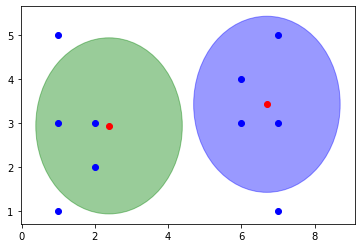


En la iteración 1 los centroides son:
[[6.52000497 3.29226962]
 [1.50997223 2.75818155]]


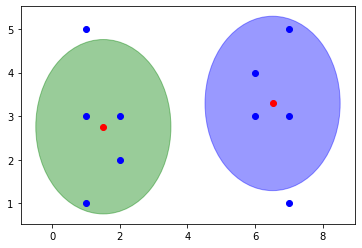


Hemos terminado en la iteración 2, con los centroides:
[[6.54008929 3.25987847]
 [1.46108287 2.7468911 ]]



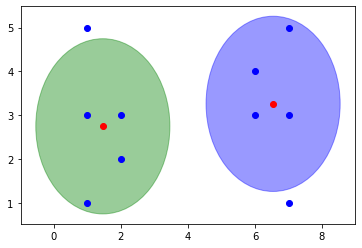

########## TEST DE K-MEDIAS ##########
El archivo prueba_clase1.txt pertenece al centroide situado en
[6.54008929 3.25987847] -> C1

El archivo prueba_clase2.txt pertenece al centroide situado en
[1.46108287 2.7468911 ] -> C2



In [28]:
##### PRUEBAS #####

X = np.array([
    [1, 1],
    [1, 3],
    [1, 5],
    [2, 2],
    [2, 3],
    [6, 3],
    [6, 4],
    [7, 1],
    [7, 3],
    [7, 5] 
])

V = np.array([[6.7, 3.43], [2.39, 2.94]])
b = 2
epsilon = .02
vName = ['C1', 'C2']


##### PRUEBAS #####

vNuevo = kMedias(X, V, b, epsilon)
testKMedias(vNuevo, vName, 'test_kmedias')